Display the interactive output of matplotlib inline. Run the following command and the resulting plots will be saved in this notebook. If you do not need it, just keep it here and move to the next cell.

In [1]:
%matplotlib notebook

# Simulate single CPi model  

This tutorial describes how to get the basic information of a single cpi model and simulate a process using Juypter. You can follow the documents and run the code cell below to get the outputs you need.

## Load the single model of cpi

'CPi' is a .py file to get the information of a single cpi model or multiple CPi file. You can also simulate the selected process with it. After it is imported, we can call the functions in this notebook.

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

## Select cpi file and process

The class 'ReadCPiFile(filename)' in CPi is to fetch and store the information in single cpi file. Once you load this class, an existing cpi file from local will be selected. Then a cpi model in Juypter is created.

In the following example, a model named 'cpi_model' will be created. User need to input the name of selected model to initiate this library. Existing models can be found in the file 'cpi_python/models'.

In [3]:
cpi_model = CPi.ReadCPiFile('abcd')

Select the model: abcd
The processes in this cpi model are:
Pi


Once the model is selected, its processes will be printed below. If you want to open other cpi files, it is better to create a new notebook for modeling. Rerun this cell is still acceptable, but their results might be mixed.

## View basic information 

After a process in selected model is created, basic information like the file name of this cpi file can be viewed and printed here.

Though the selected file name and process are printed once the model is created, they can also be reached by other functions. The example for filename is presented below. All the visible paramters are listed here: 

* filename

* process_list

* process_num

In [6]:
filename = cpi_model.filename
print filename

abcd


#### These functions will be explained in the following sections.
* view_definitions() 

* view_processdef(process)

* view_species(process)

* view_odes(process)

* view_odes_latexprint(process)

* view_initial_concentrations(process)

## View cpi definitions

With this function you can view all the contents in selected cpi file, which are the definitions of this model. All of its processes including the selected one will also be displayed here.

* view_definitions()

In [4]:
ode_def = cpi_model.view_definitions()

The cpi definitions of selected file are:

-- Simple reaction: A + B -> C + D



species A(a) = a.C();

species B(b) = b.D();

species C() = tau<1>.0;

species D() = tau<0>.D();



process Pi = [1] A(a) || [1] B(b) || [0] C() || [0] D()

           : {a-b@1};


With this function you can view the definitions of selected process. In order to initiate this function, users need to input one of the name of these processes in this model as the input value. If there is only one process in this model, its contents will be the same as 'view_definitions()'.
* view_processdef()

In [5]:
pro_def = cpi_model.view_processdef('Pi')

The cpi definitions of selected file are:

-- Simple reaction: A + B -> C + D



species A(a) = a.C();

species B(b) = b.D();

species C() = tau<1>.0;

species D() = tau<0>.D();



process Pi = [1] A(a) || [1] B(b) || [0] C() || [0] D()

           : {a-b@1};


## View species

With this function you can view all the species in selected process. Their names will be sorted alphabetically in ascending order and displayed as well.

* view_species()

In [6]:
species=cpi_model.view_species('Pi')

The species in selected process are:
A, B, C, D


## View odes

With this function you can view the ordinary differential equations (odes) generated from selected process. Suppose there are m species in the selected process, they can also be reached by the 'view_species' function. The first m odes here describe the concentration change of the species in the model, and the additional odes are to describe their affinities. 

* view_odes()

In [4]:
odes=cpi_model.view_odes('Pi')

The odes of selected process are:

diff(x1(t), t) = -1.0 * x2 * x1;
diff(x2(t), t) = -1.0 * x2 * x1;
diff(x3(t), t) = -1.0 * x3 + x2 * x1;
diff(x4(t), t) = x2 * x1;


With this function, users can print the odes in the LaTeX foramt.

* view_odes_latexprint()

In [4]:
latex_odes=cpi_model.view_odes_latexprint('Pi')

Sample text format:

\frac{\mathit{d}[x1]}{\mathit{d}t} = -[x2]*[x1]

\frac{\mathit{d}[x2]}{\mathit{d}t} = -[x2]*[x1]

\frac{\mathit{d}[x3]}{\mathit{d}t} = -[x3]+[x2]*[x1]

\frac{\mathit{d}[x4]}{\mathit{d}t} = [x2]*[x1]

Sample LaTeX format:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Simulate the selected process

With this function you can solve the odes with selected solver and store the outputs of simulation. The outputs of first m odes will be plotted in the same figure to describe the concentration change of the species in the model. You can also choose to save the output figure or just display it in the notebook. 

* simulate_process(process, solver, t_start, t_final, t_divide)

The parameter 'solver' determines which ode solver will solve this process, you can select from these two:
* odeint
* GLIMDA

The default ode solver is 'odeint' and it can solve most of the models. If this solver dose not satifiy your demands or cannot solve this model, you can use the 'GLIMDA' solver. In this case, it may take about 3 to 5 minutes to solve this complex model.

The next three input value should be positive float numbers, they are the time to start and end a process, and the number of points during this period. These parameters should be numerical.

#### The last paramter (number of points) is optional. However, if you leave it as zero, this function will use the 'GLIMDA' solver by default even you select 'odeint' at the very beginning.

This step will return a solution object for further operations. This object provides methods to plot or show numerical solutions.

In [4]:
solution = cpi_model.simulate_process('Pi','odeint', 0, 10, 100)

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


## Plot the simulation

* show_plot()

This method is in the solution object, which is returned in the simulation step.

The output figure can be saved by clicking on the disk-like button under the interactive figure. Users can interact with the labels in the figure here. Click on the different line labels and their line styles will be changed.

The default sequence of line styles are: '-', '--', '-.', ':' and unvisiable. Once the users click on the relevant labels, it will change according to this sequence. However, if you occasion to make a line unvisiable, click the same area on the label may turn it into the original style.

<IPython.core.display.Javascript object>


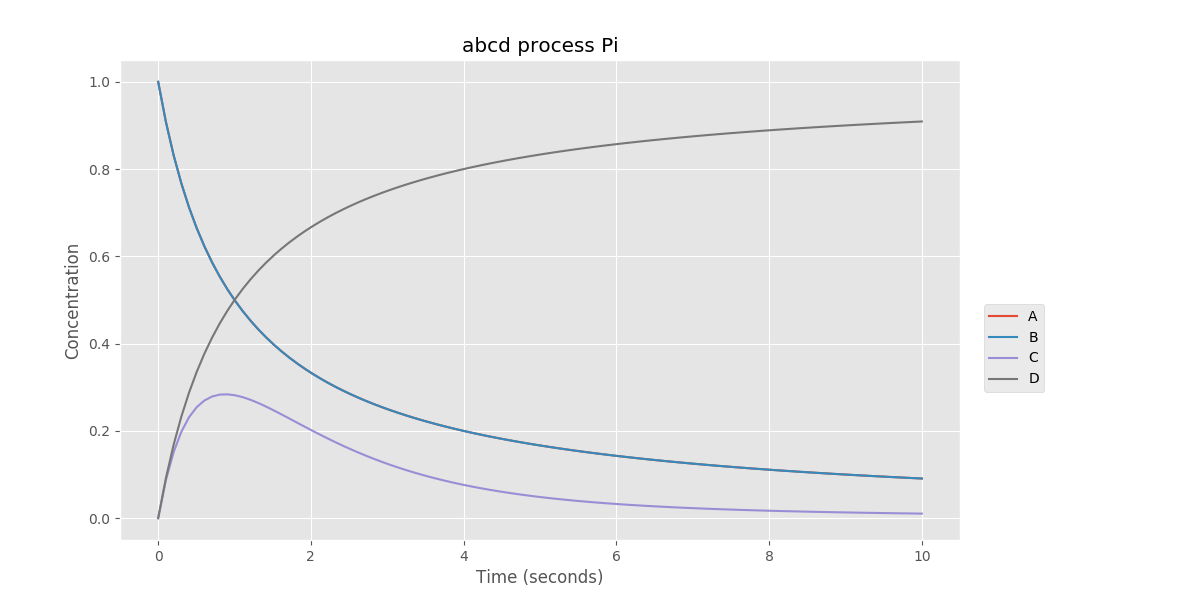

In [6]:
solution.show_plot()

## View the numerical solution of simulation

This method is in the solution object. With this function you can view the complete numerical results of simulation. If the number of odes is larger than the number of species in the selected process, the outputs which will not be plotted in the previous figure can be viewed here. 

* show_solution()

In [7]:
num_solution = solution.show_solution()
print num_solution

[[ 1.          0.90825688  0.83193278  0.76744187  0.71223022  0.66442953
   0.62264151  0.58579881  0.55307262  0.52380952  0.49748743  0.47368421
   0.45205479  0.43231441  0.41422594  0.39759036  0.38223938  0.36802974
   0.35483871  0.34256056  0.33110368  0.32038835  0.31034483  0.30091186
   0.2920354   0.28366763  0.27576602  0.26829269  0.26121373  0.25449872
   0.24812031  0.2420538   0.23627686  0.23076924  0.22551253  0.22048998
   0.21568628  0.21108743  0.20668059  0.20245399  0.1983968   0.19449902
   0.19075145  0.18714556  0.18367347  0.18032787  0.17710197  0.17398946
   0.17098446  0.1680815   0.16527546  0.16256158  0.15993538  0.15739269
   0.15492958  0.15254237  0.15022762  0.14798206  0.14580265  0.1436865
   0.1416309   0.13963329  0.13769124  0.13580247  0.13396482  0.13217623
   0.13043478  0.12873862  0.12708601  0.12547528  0.12390488  0.1223733
   0.12087912  0.11942099  0.11799762  0.11660777  0.11525029  0.11392405
   0.11262799  0.11136108  0.11012236  0

## Compare process in two solvers

With the function 'compare_solver', users can simulate one process with two solvers('odeint' and 'GLIMDA') at the same time and compare the difference of their graphs. The simulation process will be the slected process of current model. This function needs five input variables.

* compare_solver(process, t_start, t_final, t_divide, plot_type)

The fourth input variable 'plot_type' represent the type to plot the figure. Two plot types are supported in this function. All the solutions can be plotted together in a single figure or separately in several figures.

* single
* separate

Time Start: 0.0, Time End: 10.0, Number of Times: 100.
Time Start: 0.0, Time End: 10.0, Number of Times: 100.
Final Run Statistics: Simulate abcd process Pi 

 Number of steps                           : 63
 Number of function evaluations            : 305
 Number of Jacobian evaluations            : 63
 Number of error test failures             : 3
 Number of LU decompositions               : 63
 Number of nonlinear convergence failures  : 0

Solver options:

 Solver                  : GLIMDA (implicit)
 Tolerances (absolute)   : 1e-06
 Tolerances (relative)   : 1e-06

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.05 seconds.


<IPython.core.display.Javascript object>


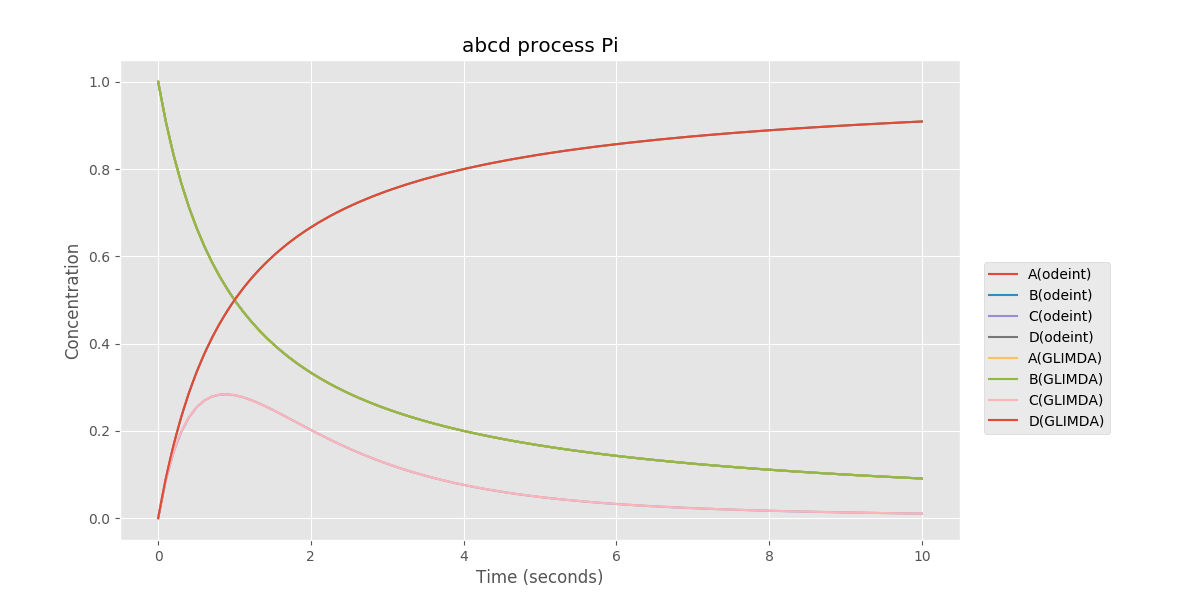

In [7]:
cpi_model.compare_solver('Pi', 0, 10, 100,'single')